In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [978]:
from collections import Counter

In [912]:
df = pd.read_csv('result.csv')

In [913]:
df

,Process,Replicate,Gene_tree,Species_Tree,Duplication,NNI,Loss
0,True Process,0,"(A,C);","((C,B),A);",0,1,1
1,Our_algorithm,0,"(A,C);","((C,B),A);",0,0,1
2,ETE3,0,"(A,C);","(A,(B,C));",0,0,1
3,True Process,1,"((B,C),A);","((C,B),A);",2,1,2
4,Our_algorithm,1,"((B,C),A);","((C,B),A);",0,0,0
...,...,...,...,...,...,...,...
292,Our_algorithm,98,"(A,C);","((C,B),A);",0,0,1
293,ETE3,98,"(A,C);","(A,(B,C));",0,0,1
294,True Process,99,"((B,C),B);","((C,B),A);",1,0,1
295,Our_algorithm,99,"((B,C),B);","((C,B),A);",1,0,1


In [914]:
True_Duplication = pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['Duplication'])
TRUE_NNI = pd.DataFrame(list(df[(df.Process == "True Process")]['NNI']),columns=['NNI'])
TRUE_Loss = pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['Loss'])
concat_true = pd.concat([True_Duplication,TRUE_Loss],axis=1)

In [928]:
True_Duplication['Replicate']=[i for i in range(99)]
O_Duplication['Replicate']=[i for i in range(99)]
ETE3_Duplication['Replicate']=[i for i in range(99)]


In [980]:
print(Counter(list(O_NNI['NNI'])))

Counter({0: 68, 1: 25, 2: 5, 3: 1})


In [981]:
O_Duplication = pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['Duplication']),columns=['Duplication'])
O_NNI = pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['NNI']),columns=['NNI'])
O_Loss = pd.DataFrame(list(df[(df.Process == "Our_algorithm")]['Loss']),columns=['Loss'])
concat_O = pd.concat([O_Duplication,O_Loss],axis=1)

In [930]:
ETE3_Duplication = pd.DataFrame(list(df[(df.Process == "ETE3")]['Duplication']),columns=['Duplication'])
ETE3_NNI = pd.DataFrame(list(df[(df.Process == "ETE3")]['NNI']),columns=['NNI'])
ETE3_Loss = pd.DataFrame(list(df[(df.Process == "ETE3")]['Loss']),columns=['Loss'])
concat_ETE3 = pd.concat([ETE3_Duplication,ETE3_Loss],axis=1)

In [931]:
true_reconils_dups= pd.DataFrame(concat_true-concat_O)
val =['reconILS' for i in range(99)]
true_reconils_dups['Algorithm']=val
true_reconils_dups['Replicate']=[i for i in range(99)]

In [974]:
true_reconils_dups

,Duplication,Loss,Algorithm,Replicate
0,0,0,reconILS,0
1,2,2,reconILS,1
2,0,-2,reconILS,2
3,0,0,reconILS,3
4,0,0,reconILS,4
...,...,...,...,...
94,-1,0,reconILS,94
95,1,1,reconILS,95
96,1,1,reconILS,96
97,0,0,reconILS,97


In [933]:
true_ete3_dups

,Duplication,Loss,Algorithm,Replicate
0,0,0,LCA,0
1,2,2,LCA,1
2,-1,-5,LCA,2
3,0,0,LCA,3
4,0,0,LCA,4
...,...,...,...,...
94,-1,-3,LCA,94
95,1,1,LCA,95
96,1,1,LCA,96
97,0,0,LCA,97


In [934]:
true_ete3_dups= pd.DataFrame((concat_true-concat_ETE3))
val =['LCA' for i in range(99)]
true_ete3_dups['Algorithm']=val

true_ete3_dups['Replicate']=[i for i in range(99)]

In [971]:
val=0
for i in list(true_ete3_dups['Loss']):
    if i<0:
        val=val+1

In [972]:
val

43

In [973]:
new =pd.concat([true_ete3_dups,true_reconils_dups],axis=0)[['Duplication','Algorithm','Replicate']]
pd.melt(new, id_vars =['Algorithm'])

,Algorithm,variable,value
0,LCA,Duplication,0
1,LCA,Duplication,2
2,LCA,Duplication,-1
3,LCA,Duplication,0
4,LCA,Duplication,0
...,...,...,...
391,reconILS,Replicate,94
392,reconILS,Replicate,95
393,reconILS,Replicate,96
394,reconILS,Replicate,97


Text(0, 0.5, 'Infered- True')

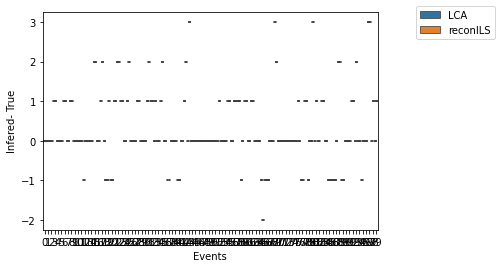

In [892]:
sns.boxplot(x="Replicate", y="value",hue="Algorithm", data=pd.melt(new, id_vars =['Algorithm','Replicate']))
plt.xlabel("Events")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.ylabel("Infered- True")

In [870]:
true_ete3_dups

,Duplication,Loss,Algorithm,Replicate
0,0,0,LCA,0
1,0,0,LCA,1
2,0,-4,LCA,2
3,1,1,LCA,3
4,0,0,LCA,4
...,...,...,...,...
95,-1,-7,LCA,95
96,0,0,LCA,96
97,3,1,LCA,97
98,0,-6,LCA,98


In [871]:
sns.boxplot(x="variable", y="value", data=pd.melt(pd.concat([ETE3])))

NameError: name 'ETE3' is not defined

In [872]:
TRUE_Loss['Replicate']=[i for i in range(100)]
O_Loss['Replicate']=[i for i in range(100)]
ETE3_Loss['Replicate']=[i for i in range(100)]


In [830]:
True_Duplication['Replicate']=[i for i in range(100)]
O_Duplication['Replicate']=[i for i in range(100)]
ETE3_Duplication['Replicate']=[i for i in range(100)]


ValueError: Length of values (100) does not match length of index (99)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


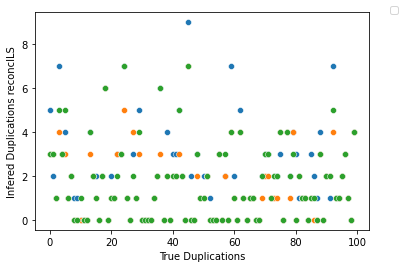

<Figure size 432x288 with 0 Axes>

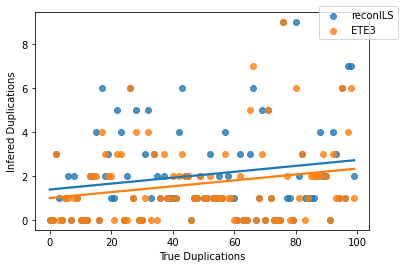

<Figure size 432x288 with 0 Axes>

In [884]:
import seaborn as sns


True_Duplication['Replicate']=[i for i in range(100)]
O_Duplication['Replicate']=[i for i in range(100)]
ETE3_Duplication['Replicate']=[i for i in range(100)]

result1 =pd.concat([True_Duplication['Replicate'],True_Duplication['Duplication']], ignore_index=True,axis=1)

result12 =pd.concat([O_Duplication['Replicate'],O_Duplication['Duplication']], ignore_index=True,axis=1)

sns.regplot(x=result1[0], y=result1[1], data=result1, fit_reg=True, ci=None, label='reconILS')
sns.regplot(x=result12[0], y=result12[1], data=result12, fit_reg=True, ci=None, label='ETE3')




plt.xlabel("True Duplications")
plt.ylabel("Infered Duplications")
# Show the plot

plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()
plt.clf()


In [804]:
con

0  1
reconILS 0   5  3
         1   2  3
         2   1  1
         3   7  4
         4   3  3
...         .. ..
ETE3     95  1  1
         96  1  5
         97  1  0
         98  1  0
         99  0  4

[200 rows x 2 columns]

In [ ]:
import seaborn as sns



result1 =pd.concat([TRUE_Loss,O_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
result2 =pd.concat([TRUE_Loss,ETE3_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
sns.scatterplot(data=result1,x=1,y=0)
plt.xlabel("True Duplications")
plt.ylabel("Infered Duplications reconcILS")
# Show the plot
plt.show()
plt.clf()

sns.scatterplot(data=result2,x=1,y=0)
plt.xlabel("True Duplications")
plt.ylabel("Infered Duplications LCA")
plt.show()

In [ ]:
import seaborn as sns



result =pd.concat([TRUE_Loss,O_Loss.rename(columns={'b':'a'})], ignore_index=True,axis=1)
sns.scatterplot(data=result,x=1,y=0)
 
# Show the plot
plt.show()

In [874]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Loss']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "ETE3")]['Loss']),columns=['NNI']))

In [875]:
rho

-0.3318572030658975

In [880]:
from scipy.stats import spearmanr
rho, p = spearmanr(pd.DataFrame(list(df[(df.Process == "True Process")]['Duplication']),columns=['NNI']),pd.DataFrame(list(df[(df.Process == "ETE3")]['Duplication']),columns=['NNI']))

In [881]:
rho

0.8984096564298348

In [205]:
sns.scatterplot(x='0',y='1',data=concat_NNI)

NameError: name 'concat_NNI' is not defined

<AxesSubplot:xlabel='0', ylabel='1'>

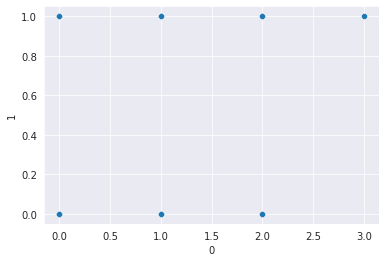

In [367]:
sns.scatterplot(x='0',y='1',data=concat_NNI)